In [90]:
# setup environment: (virtual) myenv, python 3.10.12, pandas 2.0.3, ZIPfile, matplotlib, seaborn
# source myenv/Scripts/activate (command activates the virtual environment)
# pip install pandas matplotlib seaborn (scalarformatter included in matplotlib)

# Walmart Sales Data Analytics Capstone 2025

# Data Cleaning and Preprocessing Script
# Dataset_1
import pandas as pd
import zipfile
import os


# Define ZIP file path (absolute)
zip_file_path = r"C:\Users\Kyisha\OneDrive\Walmart Sales Data Analytics Capstone 2025\Dataset_1.zip"

# Convert to a relative path
relative_path = os.path.relpath(zip_file_path, start=os.getcwd())

# Ensure extraction directory exists
extract_dir = "extracted_files"
os.makedirs(extract_dir, exist_ok=True)

# Open the ZIP file and extract contents
with zipfile.ZipFile(relative_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Display the first few rows
print(df.head())

print(df.info())   # View column names and data types

print(df.describe())  # Summary of columns

# Check for missing values (none in the dataset)
missing_values = df.isnull().sum()

print("Missing values in each column:\n", missing_values)

# Check for duplicate rows
print(df.duplicated().sum())

# Convert 'Stay_In_Current_City_Years' to numeric, replacing '4+' with 4
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years']. replace('4+', 4).astype(int)

# Mapping for age ranges
# Assuming the age ranges are represented as strings (ex. ages 0,1,2,3...17) in the DataFrame
# Makes it easier to convert them to numeric values for analysis

# Mapping age ranges to their midpoint values
age_mapping = {
    '0-17': 9, '18-25': 21, '26-35': 30, '36-45': 40, 
    '46-50': 48, '51-55': 53, '55+': 55
}


# Ensure 'Age' column is treated as a string before replacing
df['Age'] = df['Age'].astype(str).replace(age_mapping)

# Explicitly convert the column to integer after replacing
df['Age'] = pd.to_numeric(df['Age'], errors='coerce', downcast='integer')

# Verify conversion
print(df['Age'].unique())  # Should display integer values

print(df.dtypes)  # Check data types after conversion

print(df.head())  # Display first few rows

# Save the cleaned DataFrame to a new CSV file
df.to_csv("cleaned_walmart_data.csv", index=False)

print("Cleaned data saved to 'cleaned_walmart_data.csv'")  # Final output message

pd.set_option('future.no_silent_downcasting', True)
# Note: This option is deprecated and may be removed in future versions of pandas.

# End of the script
# Note: Ensure the file paths are correct and accessible in your environment.


   User_ID Product_ID Gender  Age  Occupation City_Category  \
0  1000001  P00069042      F    9          10             A   
1  1000001  P00248942      F    9          10             A   
2  1000001  P00087842      F    9          10             A   
3  1000001  P00085442      F    9          10             A   
4  1000002  P00285442      M   55          16             C   

   Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                           2               0                 3      8370  
1                           2               0                 1     15200  
2                           2               0                12      1422  
3                           2               0                12      1057  
4                           4               0                 8      7969  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtyp

In [92]:
# Dataset_2
# Cleaning and preprocessing (continued)
# Define ZIP file (absolute)
zip_file_path = os.path.relpath(r"C:\Users\Kyisha\OneDrive\Walmart Sales Data Analytics Capstone 2025\Dataset_2.zip")

# Convert to a relative path
relative_path = os.path.relpath(zip_file_path, start=os.getcwd())

# Ensure extraction directory exists
extract_dir = "extracted_files"
os.makedirs(extract_dir, exist_ok=True)

# Open the ZIP file and extract contents
with zipfile.ZipFile(relative_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Display the first few rows
print(df.head())

print(df.info())   # View column names and data types

print(df.describe())  # Summary of columns

# Check for missing values (none in the dataset)
missing_values = df.isnull().sum()

print("Missing values in each column:\n", missing_values)

# Check for duplicate rows (none in the dataset)
print(df.duplicated().sum())

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Round and convert only numeric columns to integers
df[numeric_cols] = df[numeric_cols].round().astype(int)

# Verify conversion
print(df.dtypes)

print(df.head())  # Check if numeric values are rounded

# Save the cleaned DataFrame to a new CSV file
df.to_csv("cleaned_walmart_sales_data.csv", index=False)
print("Cleaned sales data saved to 'cleaned_walmart_sales_data.csv'")  # Confirmation message

# End of the script
# Note: Ensure that the paths and filenames are correct for your environment.

   User_ID Product_ID Gender  Age  Occupation City_Category  \
0  1000001  P00069042      F    9          10             A   
1  1000001  P00248942      F    9          10             A   
2  1000001  P00087842      F    9          10             A   
3  1000001  P00085442      F    9          10             A   
4  1000002  P00285442      M   55          16             C   

   Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                           2               0                 3      8370  
1                           2               0                 1     15200  
2                           2               0                12      1422  
3                           2               0                12      1057  
4                           4               0                 8      7969  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtyp

In [ ]:
# Merge the cleaned data from both CSV files

# Load CSVs
df1 = pd.read_csv("cleaned_walmart_data.csv")
df2 = pd.read_csv("cleaned_walmart_sales_data.csv")

# Reset index to create an artificial key
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)

# Merge on the newly created index
df_combined = pd.concat([df1, df2], axis=1)

# Print result
print(df_combined)

# Analysis of the combined data
# Customer spending
total_spend = df1.groupby("User_ID")["Purchase"].sum()
print("Total spend per user:\n", total_spend)

# Average spent by age group
avg_spend_age = df1.groupby("Age")["Purchase"].mean()
print("Average spend by age group:\n", avg_spend_age)

# Round the average spent by age group to the nearest integer
avg_spend_age = df1.groupby("Age")["Purchase"].mean().round(0).astype(int)
print("Average spend by age group (rounded):\n", avg_spend_age)

# Total sales holiday and non-holiday
sales_holiday = df2.groupby("Holiday_Flag")["Weekly_Sales"].sum()
print("Total sales during holidays:\n", sales_holiday)

# save the combined DataFrame to a new CSV file
df_combined.to_csv("combined_walmart_data.csv", index=False)
print("Combined data saved to 'combined_walmart_data.csv'")  # Confirmation message

# End of the script
# Note: Ensure that the paths and filenames are correct for your environment.

         index  User_ID Product_ID Gender  Age  Occupation City_Category  \
0            0  1000001  P00069042      F    9          10             A   
1            1  1000001  P00248942      F    9          10             A   
2            2  1000001  P00087842      F    9          10             A   
3            3  1000001  P00085442      F    9          10             A   
4            4  1000002  P00285442      M   55          16             C   
...        ...      ...        ...    ...  ...         ...           ...   
550063  550063  1006033  P00372445      M   53          13             B   
550064  550064  1006035  P00375436      F   30           1             C   
550065  550065  1006036  P00375436      F   30          15             B   
550066  550066  1006038  P00375436      F   55           1             C   
550067  550067  1006039  P00371644      F   48           0             B   

        Stay_In_Current_City_Years  Marital_Status  Product_Category  \
0              

C:\Users\Kyisha\AppData\Local\Temp\ipykernel_14312\2438880805.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="Blues", edgecolor="black")


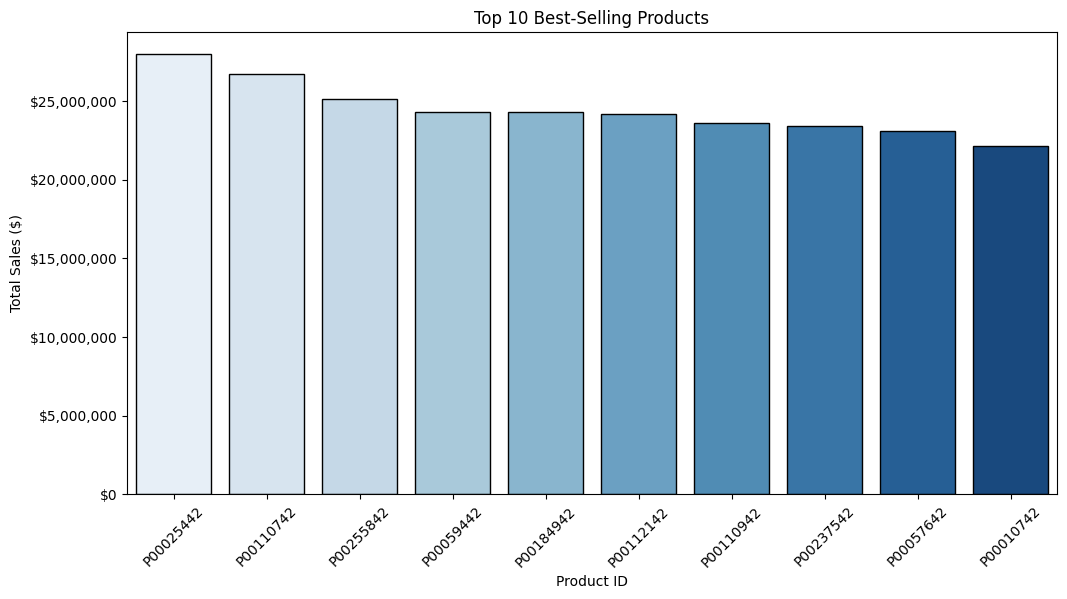

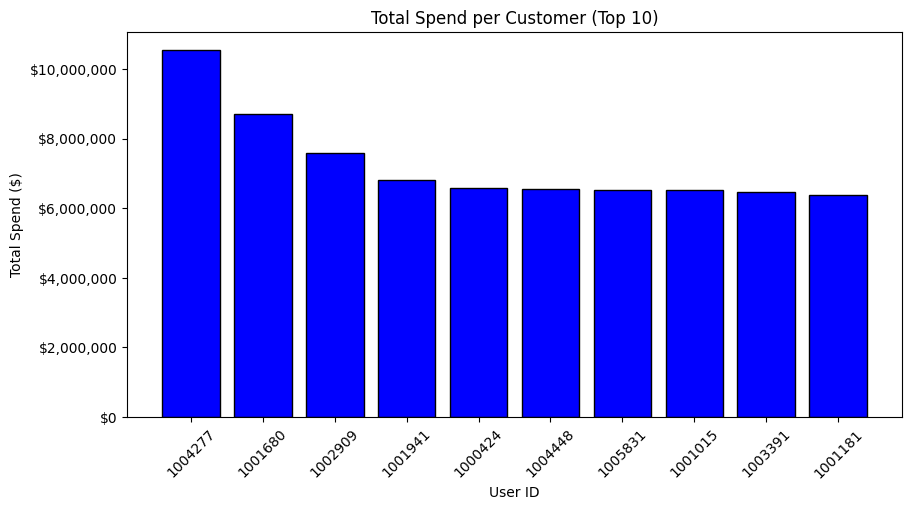

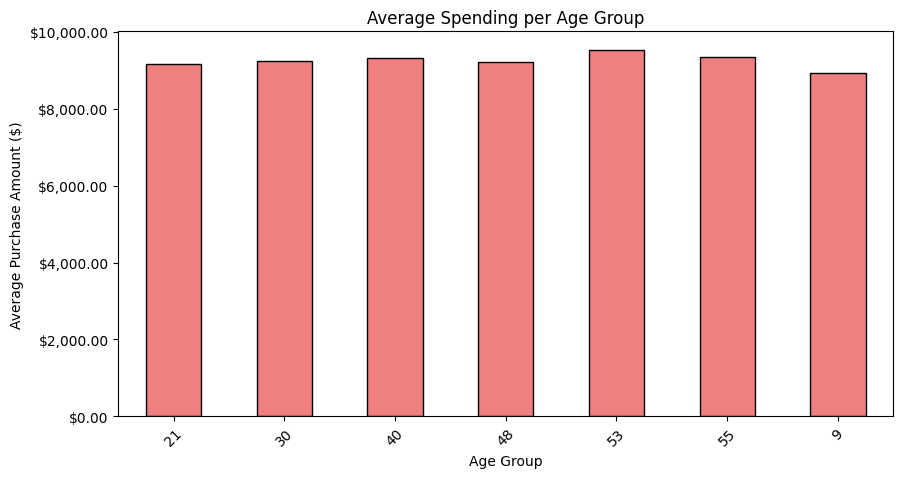

KeyError: 'Holiday_Flag'

In [93]:
# Data Visualization for Walmart Sales Data
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

# Convert absolute path to relative
file_path = os.path.relpath(r"c:\Users\Kyisha\OneDrive\Walmart Sales Data Analytics Capstone 2025\combined_walmart_data.csv")

# Group by Product ID and the purchase amounts
top_products = df.groupby("Product_ID")["Purchase"].sum().sort_values(ascending=False).head(10)

# Plot the top-selling products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette="Blues", edgecolor="black")

# Labels & title
plt.xlabel("Product ID")
plt.ylabel("Total Sales ($)")
plt.title("Top 10 Best-Selling Products")
plt.xticks(rotation=45)

# Format Y-axis with commas for readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Show the plot
plt.show()

# Group data by User_ID and total purchase amounts
total_spend = df.groupby("User_ID")["Purchase"].sum().sort_values(ascending=False).head(10)  # Top 10 spenders

# Create a bar chart with blue bars and black borders
plt.figure(figsize=(10, 5))
plt.bar(total_spend.index.astype(str), total_spend.values, color="#0000FF", edgecolor="black")

# Labels & Title
plt.xlabel("User ID")
plt.ylabel("Total Spend ($)")
plt.title("Total Spend per Customer (Top 10)")
plt.xticks(rotation=45)

# Remove scientific notation on Y-axis and format for it to show full dollar amounts
plt.ticklabel_format(style='plain', axis='y') 
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

# Format Y-axis to show full dollar amounts with commas
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Show plot
plt.show()

# Average Spend per Age Group (Bar Chart)
# Convert 'Age' to string for better grouping in the plot
df["Age"] = df["Age"].astype(str)

# Calculate average spend per age group, rounded to 2 decimal places
avg_spend_age = df.groupby("Age")["Purchase"].mean().round(2)

# Create a bar chart
plt.figure(figsize=(10, 5))
avg_spend_age.plot(kind="bar", color="lightcoral", edgecolor="black")

# Labels & Title
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount ($)")
plt.title("Average Spending per Age Group")
plt.xticks(rotation=45)

# Y-axis as dollars with commas
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x:,.2f}"))

# Show plot
plt.show()

# Holiday vs. Non-Holiday Sales (Pie Chart)
sales_holiday = df.groupby("Holiday_Flag")["Weekly_Sales"].sum()
labels = ["Non-Holiday Sales", "Holiday Sales"]
colors = ["green", "red"]

plt.figure(figsize=(6, 6))
plt.pie(sales_holiday, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Holiday vs. Non-Holiday Sales")
plt.show()

# Save the plots as images
plt.savefig("top_selling_products.png")
plt.savefig("total_spend_per_customer.png")
plt.savefig("average_spend_per_age_group.png")
plt.savefig("holiday_vs_non_holiday_sales.png")

print("Plots saved as images.")  
# End of the script
# Note: Ensure that the paths and filenames are correct for your environment.
